### Task 1: Prediction using Supervised ML 

**AIM: Predict the Percentage of a student based on the number of study**


**Author: Ranjana p sahani**

**IDE: jupyter Notebook**

**Get in  touch : [LinkedIn](https://www.linkedin.com/in/ranjana-sahani-315474205) [GitHub](https://github.com/RanjanaSahani/Data-Science-Business-Analytics [YouTube](http://youtube.com/channel/UCBDxxUw6qCVpth21XIK5_g)**
*****
  

# step 1: Import the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Reading Data from remote link using url

url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")
student_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
student_data.isnull().sum()

#Here we can see that there are no NULL values in the dataset that can affect the training of our algorithm 

Hours     0
Scores    0
dtype: int64

# Step 2: Visualize and Analyze the Dataset

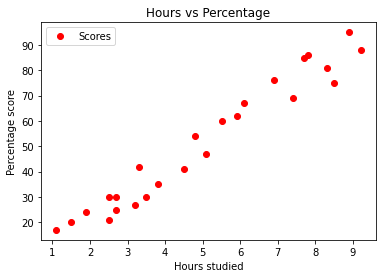

In [11]:
student_data.plot(x="Hours",y="Scores",style="ro")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.show()

# Step 3: Prepare the Data

In [13]:
#we are extracting values of Hours Data into variables x and the values of scores Data into variable y

x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [14]:
#Number of hours studied
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
#scores obtained
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [16]:
#we now split the Data into train and test datasets using scikit-Learn's built-in train_test_split()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [18]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [19]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [20]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

# Step 4:Design and Train the Machine Learning Model


In [23]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)

print("Training complete.")


Training complete.


# Step 5: Visualize the Model

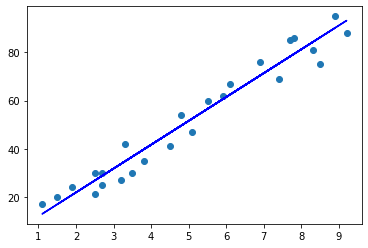

In [24]:
#plotting the regression line
line = regressor.coef_*x+regressor.intercept_

#plotting for the test Data
plt.scatter(x,y)
plt.plot(x,line,color="blue");
plt.show()

# Step 6: Make Predictions

In [25]:
print(x_test) #testing data - In Hours
y_pred = regressor.predict(x_test) #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [26]:
# Comparing Actual vs Predicated
df = pd.DataFrame({"Actual":y_test,"Predicated":y_pred})
df

,Actual,Predicated
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [27]:
#Testing with custom data of 9.25hrs/day

hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicated Score = {own_pred[0]}")

      

No of Hours = 9.25
Predicated Score = 93.69173248737539


# step 7: Evaluate the Model


 It is important to evaluate the performance of algorithm to compare how well different algorithm perform on particular dataset



Mean absolute Error

In [32]:
from sklearn import metrics 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982


Max Error

In [34]:
print("Max Error:",metrics.max_error(y_test,y_pred))

Max Error: 6.732260779489835


Mean Squared Error 

In [35]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 21.598769307217456


#                                      Thank you